In [ ]:
import sys
#sys.path.insert(0, '../src')
import numpy as np
import matplotlib.pyplot as plt


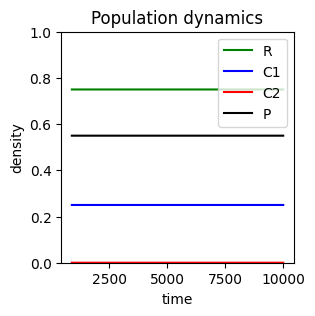

In [14]:
from analysis_tools import plot_individual_case

# Params
params = {
    'a1': 1,
    'a2': 8,
    'aP': 1,
    'h1': 0,
    'h2': 0.5,
    'hP': 0,
    'd1': 0.2,
    'd2': 1,
    'dP': 0.25
}

plot_individual_case(params)

In [5]:
from ode import full_system
from utils import simulate_and_save

sys.path.insert(0, '..')

resolution = 30


a1 = 1

a2 = 8

h2 = 0.5

d1 = 0.05

aP = 1

dP = 0.25

d2 = np.linspace(0, a2/(1+h2*a2), resolution+2)[1:-1] # avoid 0 and the value where the predator goes extinct

params = {
    'a1': a1,
    'a2': a2,
    'aP': aP,
    'h1': 0,
    'h2': h2,
    'hP': 0,
    'd1': d1,
    'd2': None,
    'dP': dP
}

max_densities = np.zeros((resolution, 4))
min_densities = np.zeros((resolution, 4))

for id_d2 in range(resolution):

    # convert functional response to saturating
    gamma = a1/a2 + h2*d1
    sat_a = gamma*a2
    sat_h = h2/gamma
    sat_d = d1

    # Simulate population dynamics
    initial_density = [0.01,0.01,0.01,0.01] # initial density

    tend  = 100000 # quite short
    tstep = 0.1
    time_array = np.arange(0, tend, tstep) # time for simulation
    simulation_params = {'a1':sat_a, 'a2':a2, 'aP':aP, 'h1':sat_h, 'h2':h2, 'hP':0, 'd1':sat_d, 'd2':d2[id_d2], 'dP':dP}

    filename = f'../results/timeseries/timeseries_RC1C2P_satsatpred_{simulation_params["a1"]}_{simulation_params["a2"]}_{simulation_params["aP"]}_{simulation_params["h1"]}_{simulation_params["h2"]}_{simulation_params["d1"]}_{simulation_params["d2"]}_{simulation_params["dP"]}.npz'

    full_system_partial = lambda density, time: full_system(density, time, simulation_params)
    density_timeseries = simulate_and_save(
        filename=filename,
        ode_func=full_system_partial,
        x0=initial_density,
        t=time_array,
        params=simulation_params
    )

    max_densities[id_d2] = np.max(density_timeseries[50000:, :], axis=0) # maximum population density after transient dynamics
    min_densities[id_d2] = np.min(density_timeseries[50000:, :], axis=0) # minimum population density after transient dynamics


plt.plot(d2, max_densities[:, 0], 'g', linestyle='dashed')
plt.plot(d2, min_densities[:, 0], 'g', label=['R'], linestyle='solid')
plt.plot(d2, max_densities[:, 1], 'b', linestyle='dashed')
plt.plot(d2, min_densities[:, 1], 'b', label=['C1'], linestyle='solid')
plt.plot(d2, max_densities[:, 2], 'r', linestyle='dashed')
plt.plot(d2, min_densities[:, 2], 'r', label=['C2'], linestyle='solid')
plt.plot(d2, max_densities[:, 3], 'k', linestyle='dashed')
plt.plot(d2, min_densities[:, 3], 'k', label=['P'], linestyle='solid')
plt.xlabel('d2')
plt.ylabel('Min/max population density')
plt.title('Bifurcation diagram')
plt.xlim(0, a2/(1+h2*a2))
plt.ylim(0, 1.5)
plt.legend()
plt.show()


c:\Users\ToniDok\Documents\Lilla docs\GitRepos\relnonlin_predation\relnonlin_predation\src\utils.py:20: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  x = integ.odeint(ode_func, x0, t, rtol=1e-14, atol=1e-12)


KeyboardInterrupt: 

d2: 0.26


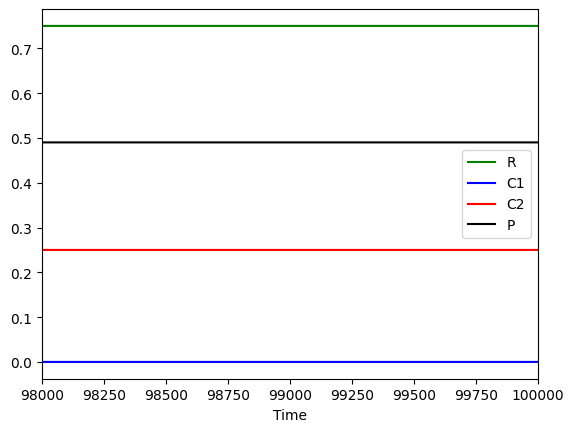

In [6]:
from ode import full_system
from utils import simulate_and_save
# Example time series
a1 = 1
a2 = 4
h2 = 1
d1 = 0.1
aP = 1
dP = 0.25
d2 = .26
# convert functional response to saturating
gamma = a1/a2 + h2*d1
sat_a = gamma*a2
sat_h = h2/gamma
sat_d = d1

# Simulate population dynamics
initial_density = [0.01,0.01,0.01,0.01] # initial density

tend  = 100000 
tstep = 0.1
time_array = np.arange(0, tend, tstep) # time for simulation
simulation_params = {'a1':sat_a, 'a2':a2, 'aP':aP, 'h1':sat_h, 'h2':h2,
                      'hP':0, 'd1':sat_d, 'd2':d2, 'dP':dP}

filename = f'../results/timeseries/timeseries_RC1C2P_satsatpred_{simulation_params["a1"]}_{simulation_params["a2"]}_{simulation_params["aP"]}_{simulation_params["h1"]}_{simulation_params["h2"]}_{simulation_params["d1"]}_{simulation_params["d2"]}_{simulation_params["dP"]}.npz'

full_system_partial = lambda density, time: full_system(density, time, simulation_params)
density_timeseries = simulate_and_save(
    filename=filename,
    ode_func=full_system_partial,
    x0=initial_density,
    t=time_array,
    params=simulation_params
)

plt.plot(np.arange(0, tend, 1), density_timeseries[:, 0], 'g', label='R')
plt.plot(np.arange(0, tend, 1), density_timeseries[:, 1], 'b', label='C1')
plt.plot(np.arange(0, tend, 1), density_timeseries[:, 2], 'r', label='C2')
plt.plot(np.arange(0, tend, 1), density_timeseries[:, 3], 'k', label='P')
plt.xlim(98000, 100000)
plt.legend()
plt.xlabel('Time')

print('d2:', d2)

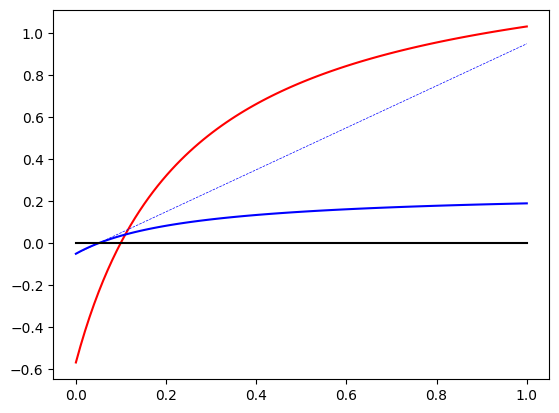

In [50]:
# Growth rates (without additional predation pressure)

simulation_params = {'a1':sat_a, 'a2':a2, 'aP':aP, 'h1':sat_h, 'h2':h2,
                      'hP':0, 'd1':sat_d, 'd2':d2, 'dP':dP}

resource = np.linspace(0, 1, 100)
plt.plot(resource, a2*resource/(1+h2*a2*resource)-d2, 'r', label='C2')
plt.plot(resource, sat_a*resource/(1+sat_h*sat_a*resource)-d1, 'b', label='C1 (non-linearised)')
plt.plot(resource, a1*resource-d1, 'b--', linewidth=0.5)
plt.plot(resource, 0*resource, 'k-')


0.9288270377733598
0.9256461232604374
0.9224652087475149
0.9192842942345925
0.91610337972167
0.9129224652087475
0.9097415506958251
0.9065606361829026
0.9033797216699802
0.9001988071570577
0.8970178926441352
0.8938369781312128
0.8906560636182903
0.8874751491053678
0.8842942345924454
0.8811133200795229
0.8779324055666005
0.874751491053678
0.8715705765407555
0.8683896620278331
0.8652087475149106
0.8620278330019882
0.8588469184890656
0.8556660039761431
0.8524850894632207
0.8493041749502982
0.8461232604373757
0.8429423459244533
0.8397614314115308
0.8365805168986084
0.8333996023856859
0.8302186878727634
0.827037773359841
0.8238568588469185
0.820675944333996
0.8174950298210736
0.8143141153081511
0.8111332007952287
0.8079522862823062
0.8047713717693837
0.8015904572564613
0.7984095427435388
0.7952286282306164
0.7920477137176939
0.7888667992047714
0.785685884691849
0.7825049701789265
0.779324055666004
0.7761431411530816
0.7729622266401591
0.7697813121272367
0.7666003976143141
0.7634194831013916


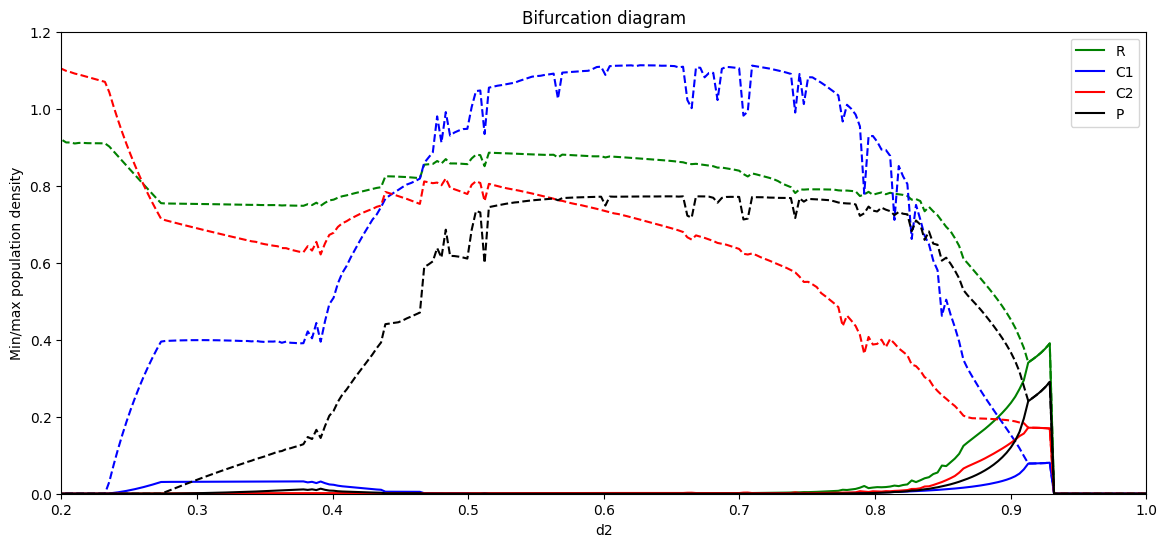

In [100]:
# Bifurcation diagram along d2 in the linsatpred model
from utils import get_grid

a1 = 1
a2 = 8
aP = 1
h2 = 0.5
dP = 0.25
resolution = 502
d1 = 0.100

d2 = get_grid(a2, h2, resolution)

max_densities = np.zeros((resolution, 4))
min_densities = np.zeros((resolution, 4))
G1_Rstar = np.zeros(resolution)
G2_Rstar = np.zeros(resolution)
G1_C1 = np.zeros(resolution)
G2_C1 = np.zeros(resolution)
G1_C2 = np.zeros(resolution)
G2_C2 = np.zeros(resolution)
G1_P = np.zeros(resolution)
G2_P = np.zeros(resolution)

# simulate for all d1 and d2 parameters 
first = True

for id_d2 in range(resolution - 211, -1, -1):
    print(d2[id_d2])
    # Simulation of population dynamics

    G_p = (a1-a2-(d1-d2[id_d2])*h2*a2)/(a1*h2*a2)
    G_q = -(d1-d2[id_d2])/(a1*h2*a2)
    G1_Rstar[id_d2] = -G_p/2 + np.sqrt(G_p**2/4-G_q)
    G2_Rstar[id_d2] = -G_p/2 - np.sqrt(G_p**2/4-G_q)
    G1_C2[id_d2] = (G1_Rstar[id_d2]+a1*dP/aP-1)/(a1-a2/(1+h2*a2*G1_Rstar[id_d2]))
    G2_C2[id_d2] = (G2_Rstar[id_d2]+a1*dP/aP-1)/(a1-a2/(1+h2*a2*G2_Rstar[id_d2]))
    G1_C1[id_d2] = dP/aP-G1_C2[id_d2]
    G2_C1[id_d2] = dP/aP-G2_C2[id_d2]
    G1_P[id_d2] = (a1*G1_Rstar[id_d2]-d1)/aP
    G2_P[id_d2] = (a1*G2_Rstar[id_d2]-d1)/aP

    init = [G2_Rstar[id_d2],G2_C1[id_d2],G2_C2[id_d2],G2_P[id_d2]] + np.random.rand(4)/10

    if all(i >= 0 for i in init):
        if first:
            initial_density = init
            first = False
    
    tend  = 60000 
    tstep = 0.1
    time_array = np.arange(0, tend, tstep) # time for simulation
    simulation_params = {'a1':a1, 'a2':a2, 'aP':aP, 'h1':0, 'h2':h2, 
                        'hP':0, 'd1':d1, 'd2':d2[id_d2], 'dP':dP}

    filename = f'../results/timeseries/timeseries_RC1C2P_linsatpred_{simulation_params["a1"]}_{simulation_params["a2"]}_{simulation_params["aP"]}_{simulation_params["h2"]}_{simulation_params["d1"]}_{simulation_params["d2"]}_{simulation_params["dP"]}.npz'

    full_system_partial = lambda density, time: full_system(density, time, simulation_params)
    density_timeseries = simulate_and_save(
        filename=filename,
        ode_func=full_system_partial,
        x0=initial_density,
        t=time_array,
        params=simulation_params
    )

    max_densities[id_d2] = np.max(density_timeseries[50000:, :], axis=0) # maximum population density after transient dynamics
    min_densities[id_d2] = np.min(density_timeseries[50000:, :], axis=0) # minimum population density after transient dynamics
    initial_density = density_timeseries[-1, :] + 0.001*np.random.rand(4)

plt.figure(figsize=(14, 6)) 
plt.plot(d2, max_densities[:, 0], 'g', linestyle='dashed')
plt.plot(d2, min_densities[:, 0], 'g', label=['R'], linestyle='solid')
plt.plot(d2, max_densities[:, 1], 'b', linestyle='dashed')
plt.plot(d2, min_densities[:, 1], 'b', label=['C1'], linestyle='solid')
plt.plot(d2, max_densities[:, 2], 'r', linestyle='dashed')
plt.plot(d2, min_densities[:, 2], 'r', label=['C2'], linestyle='solid')
plt.plot(d2, max_densities[:, 3], 'k', linestyle='dashed')
plt.plot(d2, min_densities[:, 3], 'k', label=['P'], linestyle='solid')
plt.xlabel('d2')
plt.ylabel('Min/max population density')
plt.title('Bifurcation diagram')
plt.xlim(0.2,1)#(0, a2/(1+h2*a2))
plt.ylim(0, 1.2)
plt.legend()
plt.show()

In [4]:
os.chdir('..')  # Go up one directory, so you're in relnonlin_predation\relnonlin_predation

simulation_params = {'a1':sat_a, 'a2':a2, 'aP':aP, 'h1':sat_h, 'h2':h2,
                      'hP':0, 'd1':sat_d, 'd2':d2, 'dP':dP}

filename = f'../results/timeseries/timeseries_RC1C2P_satsatpred_{simulation_params["a1"]}_{simulation_params["a2"]}_{simulation_params["aP"]}_{simulation_params["h1"]}_{simulation_params["h2"]}_{simulation_params["d1"]}_{simulation_params["d2"]}_{simulation_params["dP"]}.npz'

full_system_partial = lambda density, time: full_system(density, time, simulation_params)
density_timeseries = simulate_and_save(
    filename=filename,
    ode_func=full_system_partial,
    x0=initial_density,
    t=time_array,
    params=simulation_params)

NameError: name 'os' is not defined

In [1]:
import sys
import os
sys.path.insert(0, '..')
import numpy as np
import matplotlib.pyplot as plt
os.chdir('..\\src')

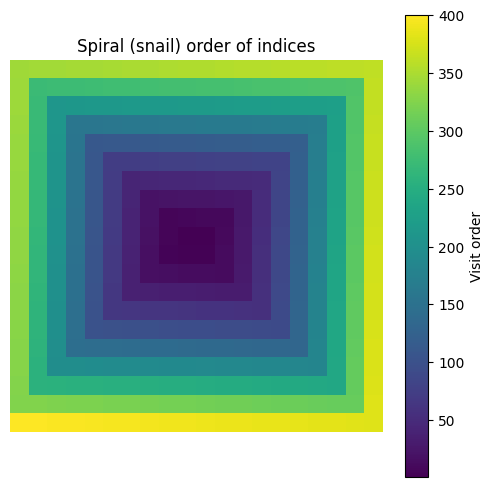

In [2]:
from utils import snail_order
n = 20  # or whatever resolution you want
spiral = snail_order(n)  # shape (n*n, 2)

# Create an empty grid and fill it with the order in which each cell is visited
spiral_grid = np.zeros((n, n), dtype=int)
for idx, (i, j) in enumerate(spiral):
    spiral_grid[i, j] = idx + 1  # +1 for visualization (starts at 1)

plt.figure(figsize=(6, 6))
plt.imshow(spiral_grid, cmap='viridis')
plt.colorbar(label='Visit order')
plt.title('Spiral (snail) order of indices')
plt.axis('off')
plt.show()

Text(0.5, 0, 'Time')

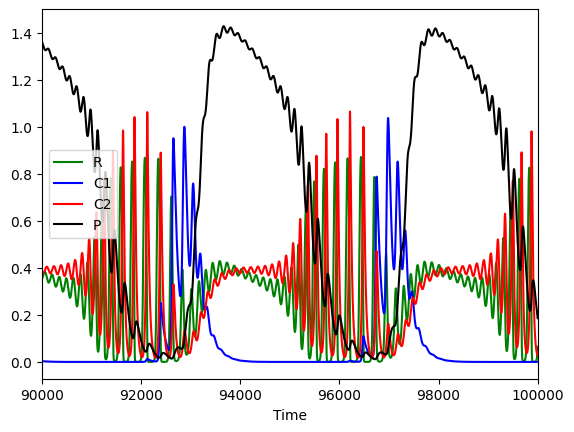

In [3]:
from ode import full_system
from utils import simulate_and_save
# Example time series
a1 = 1
a2 = 4
h2 = 1
d1 = 0.0967
aP = 0.5
dP = 0.1
d2 = .206

# Simulate population dynamics
initial_density = [0.01,0.01,0.01,0.01] # initial density

tend  = 100000 
tstep = 0.1
time_array = np.arange(0, tend, tstep) # time for simulation
simulation_params = {'a1':1, 'a2':4, 'aP':.25, 'h1':0, 'h2':1,
                      'hP':0, 'd1':0.0967, 'd2':0.258, 'dP':0.1}

filename = f'../results/timeseries/timeseries_RC1C2P_linsatpred_{simulation_params["a1"]}_{simulation_params["a2"]}_{simulation_params["aP"]}_{simulation_params["h1"]}_{simulation_params["h2"]}_{simulation_params["d1"]}_{simulation_params["d2"]}_{simulation_params["dP"]}.npz'

full_system_partial = lambda density, time: full_system(density, time, simulation_params)
density_timeseries = simulate_and_save(
    filename=filename,
    ode_func=full_system_partial,
    x0=initial_density,
    t=time_array,
    params=simulation_params,
    force_simulate=True
)

plt.plot(np.arange(0, tend, 1), density_timeseries[:, 0], 'g', label='R')
plt.plot(np.arange(0, tend, 1), density_timeseries[:, 1], 'b', label='C1')
plt.plot(np.arange(0, tend, 1), density_timeseries[:, 2], 'r', label='C2')
plt.plot(np.arange(0, tend, 1), density_timeseries[:, 3], 'k', label='P')
plt.xlim(90000, 100000)
plt.legend()
plt.xlabel('Time')
